In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris)) 

<class 'sklearn.utils.Bunch'>


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
X, y = iris.data, iris.target
print(X.shape, type(X))# (150, 4) <class 'numpy.ndarray'>
print(y.shape, type(y))# (150,) <class 'numpy.ndarray'>

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [6]:
X2 = X[:, :2]

Text(0, 0.5, 'Sepal width')

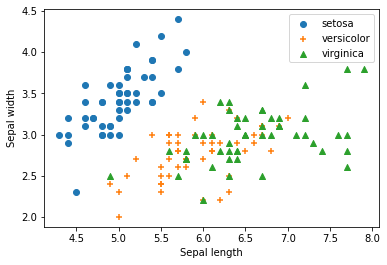

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [8]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

In [10]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Sepal width')

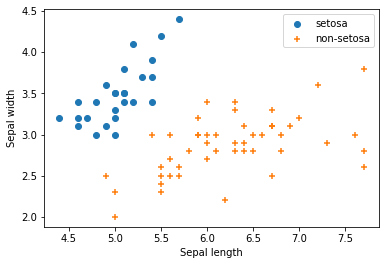

In [11]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [12]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [13]:
clf.coef_, clf.intercept_

(array([[ 34.12073491, -56.43044619]]), array([-9.78871867]))

In [14]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a, b, c)
## 103.189493433 –172.607879925 -35.2970136277

34.12073490813639 -56.430446194225546 [-9.78871867]


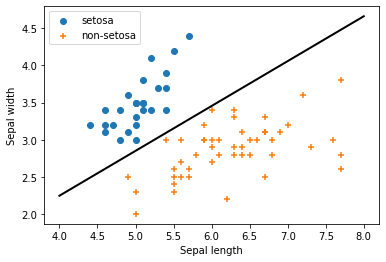

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [16]:
print(clf.predict([[4.5, 3.5]]))  # 0

[0]


In [17]:
print(clf.score(X2, y2))

0.9933333333333333


In [18]:
print(clf.score(X_test, y_test))

0.9866666666666667


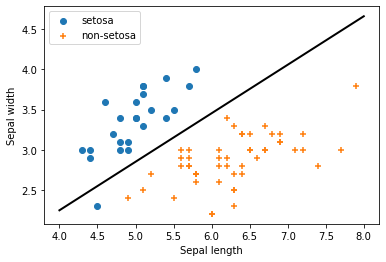

In [19]:
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [20]:
from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(X2.shape[0], 5,shuffle=True)
print(cross_val_score(clf, X2, y2, cv=cv))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

## 4개 속성 모두 이용
### 세가지 꽃 구분

In [ ]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)

In [ ]:
clf_all.score(X_test, y_test)

In [ ]:
cv = KFold(X.shape[0], 5,shuffle=True)
print(cross_val_score(clf_all, X, y, cv=cv))

## 연습장

In [21]:
from sklearn.datasets import load_iris #sklearn이 제공하는 datasets 패키지 중에 load_iris 라는 모듈을 불러오다
iris = load_iris() #그 모듈을 실행하면 iris라고 한다
print(type(iris)) #iris는 Bunch 타입이다, iris안에 많은 카테고리 같은 데이터들이 있다

<class 'sklearn.utils.Bunch'>


In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
print(iris.feature_names) #iris의 속성값

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
print(iris.target_names)  #꽆의 종류를 알 수 있다.

['setosa' 'versicolor' 'virginica']


In [26]:
iris.data #4가지 속성값들이 150개 가지고 있다.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
iris.data.shape  #150개의 행과 4개의 컬럼

(150, 4)

In [28]:
iris.target #꽃의 종류를 0,1,2로 나누다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
iris.target.shape  #150개 짜리 벡터
#꽃의 종류를 분류해놓다 0,1,2로

(150,)

In [30]:
X, y = iris.data, iris.target #X, y: 입력변수(iris.data)와 목적변수(iris.target)로 대입을 해 분석하다
print(X.shape, type(X))# (150, 4)
print(y.shape, type(y))# (150, )

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [31]:
X2 = X[:, :2]#X의 모든 행의 앞에서 2개만 가져오다
X2  #원래 X의 컬럼은 4개이지만 , 앞의 두개 컬럼만 가져오다. 행은 모든 행 가져오다
#꽃밭침의 길이와 너비만 가져오다 꽃잎은 안가져오다

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [32]:
X2.shape #행의 수는 150, 컬럼은 2개 -> 프로그램 설명하기 좋게 2가지 특성으로 분류작업을 하다

(150, 2)

In [33]:
X2[:,0] #꽃받침의 길이

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [34]:
X2[:,0].reshape(-1, 1) #열을 한개 짜리로 강제로 만들다

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [35]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
[y == 0]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0, 0.5, 'Sepal width')

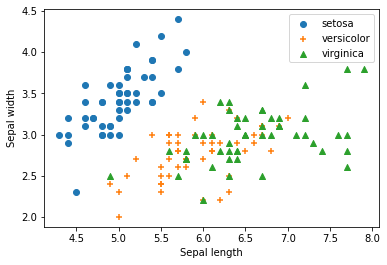

In [38]:
%matplotlib inline 
# 그림을 그리기 위해 matplotlib inline 호출하다
import matplotlib.pyplot as plt #plt 함수라 이름을 붙여주다

markers = ['o', '+', '^'] #marker o + ^ 로 지정해주다
for i in range(3):  #꽃의 종류가 3개라 , range를 3개로 주다 
    xs = X2[:, 0][y == i] #X2[:, 0] :행은 다가져오기 1열(sepal length)값만 가져오다. # x좌표에는 첫번째 칼럼을 넣다
    ys = X2[:, 1][y == i] #y좌표에는 두번째 칼럼을 가져오다 #꽃받침의 길이와 폭을 가지고 그림을 그리겠다
    plt.scatter(xs, ys, marker=markers[i]) #모든 점을 다 그리는게 아니라, 세점으로 나누어서 그리다, y값이  i 인것만 뽑아내다
#y는 target 값이다. 꽃의 종류이다 0,1,2 인것들 3번에 나누어서 점을 찍다. y는0,1,2 중 하나이다
#[y == i]: y는 0 , 1, 2냐는 조건문 boolean을 가져온다. True, False값 가져오다
#모든 점을 다 그리는게 아니라, y값이 i 인것 만 뽑아내다, xs,ys가 모두 True값을 가질때 marker를 하다
#xs의 경우   X2[:, 0]: 처음에는 0열만 다 가져오다
# plt.scatter(xs, ys, marker=markers[i] : xs에서 0 인것 점 찍고, ys에서 1인것 점 찍다
# marker는 markers[i]해주다  'o': 첫번째 꽃, +: 두번째 꽃..
plt.legend(iris.target_names) #legend: target(꽃 종류)에 이름을 주다 , target은 현재 0,1,2로 되어있다
#iris.target_names에 'setosa', 'versicolor', 'virginica' 이름이 들어가 있다.
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

#150개 샘플을 for 문을 돌려 0인 꽃, 1인 꽃, 2인 꽃을 화면에 그려보다

In [39]:
y2 = y.copy()  #y의 복사본을 만든다  #y는 target 0,1,2
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다.
y2 # 2가 다 사라지다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
X2

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X2, y2, test_size=0.5) #x2, y2 인자로 넣어주다
#적당히 섞어 훈련데이터와 테스트 데이터로 나누어 주다 50% 데이터 시험용 (150개 중 75개), 50%데이터는 훈련용

In [41]:
X_train.shape #행은 75개이고, 컬럼은 2개이다

(75, 2)

In [42]:
X_test.shape

(75, 2)

Text(0, 0.5, 'Sepal width')

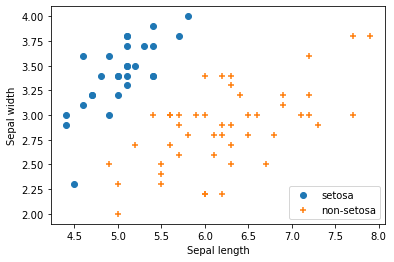

In [43]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i] #X_train : x2와 y2(target 중 2개를 합친)으로 만들어진 훈련용 데이터로 실행하다
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] #binary_names 이름 넣다
plt.legend(binary_names) #legend -> binary_names으로 바꾸다
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [44]:
#직선으로 두 그룹을 나눌 수 있는지, 이진분류를 하다
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)#SGDClassifier를 초기화 하다, max_iter=1000: 1000이상 학습시키지 말아라(거의 디폴트 값으로 넣다. 큰 의미 없다)
clf.fit(X_train, y_train) #fit을 수행하면, train 데이터 입력에 대해 출력이 나오다

SGDClassifier()

In [45]:
clf.coef_, clf.intercept_ #clf의 기울기와 절편
#(array([[   54.40900563, -87.5547217 ]]), array([-18.83547121]))
# 54.40900563 : 입력변수의 첫번째 sepal length에 곱해지는 계수
#-87.5547217: sepal width에 곱해지는 값
#-18.83547121: 절편

(array([[ 125.58535547, -178.37377607]]), array([-74.76903104]))

In [46]:
a = clf.coef_[0,0] #가중치의 첫번째 값, clf.ceof의 첫번째 행 첫번째 열 : 54.409005628517605
b = clf.coef_[0,1] # clf.ceof의 첫번째 행 두번째 열: -87.55472170106285
c = clf.intercept_
print(a, b, c)


125.58535547041247 -178.37377607492462 [-74.76903104]


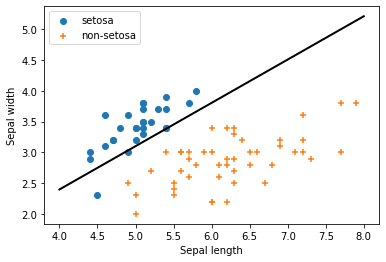

In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
    
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 3) #직선을 긋다 4부터 8사이 점 3개를 찍다 -> 4, 6, 8에 점 찍다
#결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)
#XX: x값 , (-a/b)*XX - c/b: y값
#(-a/b)*XX - c/b 을 그리다
#이 직선은 두개 class를 가장 잘 나누는 직선이다.

ax + by + c < 0
x: sepal length
y: sepal width
x와 y에 적당한 가중치를 곱하고 상수를 더한 것이 0보다 작으면 / 0 보다 크면 에 따라 분류를 나누다. = 등호 일때가 경계선이다
위의 식을 풀면
y = -(a/b)x - (c/b) 이 직선이 결정경계이다 = 분류하는 작업이다

In [48]:
print(clf.predict([[4.5, 3.5]])) #0
#[4.5, 3,5]인 꽃이라면, 이 꽃은 어느 꽃에 속할까? ->setosa, predict함수를 사용하다

[0]


In [49]:
print(clf.predict([[6.5, 3]]))

[1]


In [50]:
print(clf.score(X2,y2))  #모든 데이터를 다 넣고 점수를 매기다
#X2: 열이 2개인 모든 sepal length, sepal width데이터
#y2: target(꽃종류)이 0,1인 데이터
#150개 데이터로 테스트

0.98


In [51]:
print(clf.score(X_test, y_test)) #훈련에 쓰지 않은 데이터로 테스트를 하다
#75개, 안쓴 데이터로 테스트

0.9866666666666667


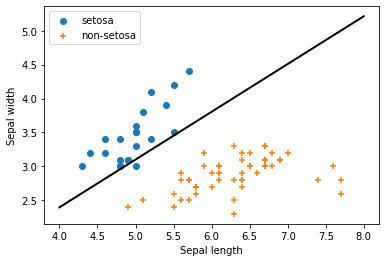

In [52]:
#테스트에서 틀린 데이터를 찾다
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i]) #test 데이터 점을 찍다
    
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 3)
#결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [57]:
X2.shape

(150, 2)

In [53]:
from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(X2.shape[0], 5, shuffle=True)#주어진 150개 데이터를 5개로 나누어서, 30개로 5번 랜덤을 섞다
print(cross_val_score(clf, X2, y2, cv=cv))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

### 4개 속성 모두 이용
#### 세가지 꽃 구분

In [58]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data,iris.target #X= iris.data , y=iris.target(0,1,2 아이리스 종류)
# X: 4개 컬럼 다 쓰겠다 y: 0,1,2   3가지 종류 다 쓰겠다
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
clf_all.score(X_test, y_test)  #test데이터로 검증하다

In [ ]:
cv = KFold(X.shape[0], 5, shuffle=True)
print(cross_val_score(clf_all, X, y, cv=cv))
#모든 data, target을 다 사용했을떄, 5번 램덤으로 돌려 성능 검사하다